# Análisis exploratorio

importar paquetes necesarios.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openslide

Rutas relevantes

In [37]:
#Images path 
WSIs_path = '/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI' 
#Tabular path
tabular_path = '/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/tabular/TCGA-BRCA_clinical.csv'

## 1.) Tamaño

In [3]:
WSIs_size = np.sum([os.path.getsize(f'{WSIs_path}/{WSI_name}') for WSI_name in os.listdir(WSIs_path)]) / 1e9
WSIs_names = os.listdir(WSIs_path)
print(f'El dataset pesa un total de {round(WSIs_size,2)} GB')
print(f'numero de elementos: {len(WSIs_names)}')

El dataset pesa un total de 1085.46 GB
numero de elementos: 1062


## 2.) Metadatos 

In [24]:
metadata = {'X size':[], 'Y size':[], 'Magnitude':[]}
i = 0

for WSI_name in WSIs_names:
    WSI = openslide.OpenSlide(f'{WSIs_path}/{WSI_name}')
    metadata['X size'].append(WSI.dimensions[0])
    metadata['Y size'].append(WSI.dimensions[1])

    try:
        mag = str(int(WSI.properties['aperio.AppMag']))
    except:
        mag = 'None'
    
    metadata['Magnitude'].append(mag)

    i = i + 1
    print(f'ledios {i} archivos de {len(WSIs_names)}', end='\r')

metadata = pd.DataFrame(metadata)

In [25]:
metadata.describe()

,X size,Y size
count,1062.000000,1062.000000
mean,96267.978343,71103.989642
std,35073.914151,23802.896538
min,11940.000000,13347.000000
25%,71400.000000,58100.750000
50%,98467.500000,74638.000000
75%,119390.000000,85133.000000
max,211626.000000,420096.000000


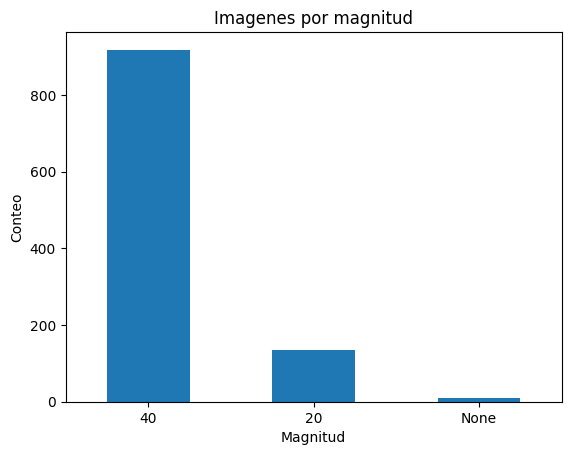

In [29]:
metadata.Magnitude.value_counts().plot(kind="bar")
plt.title("Imagenes por magnitud")
plt.xlabel("Magnitud")
plt.xticks(rotation=0)
plt.ylabel("Conteo")
plt.show()

## 3.) Visualizacione aleatorias

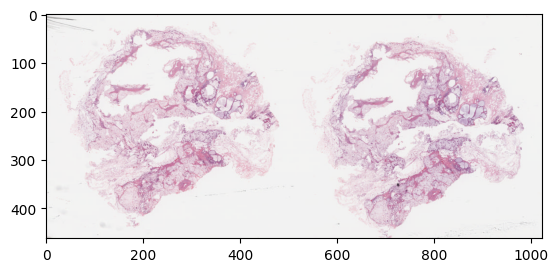

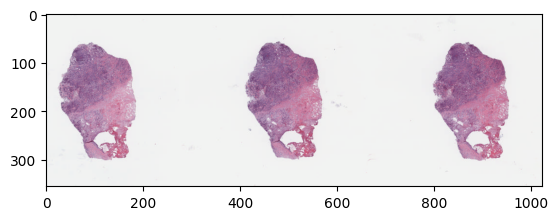

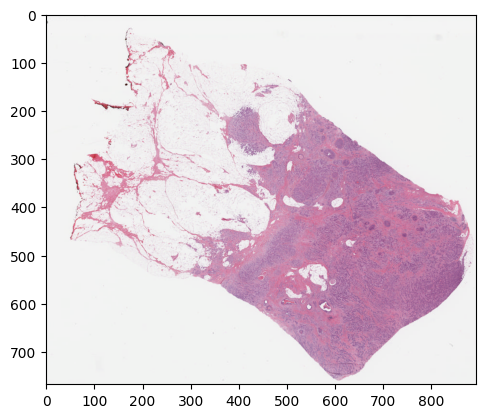

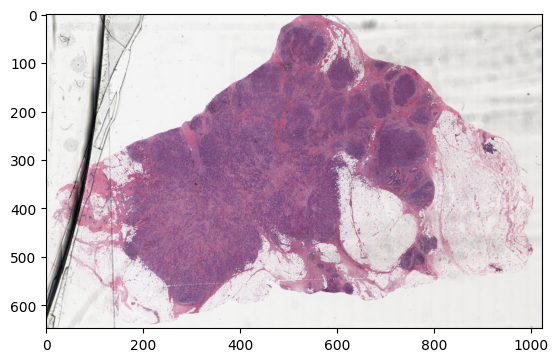

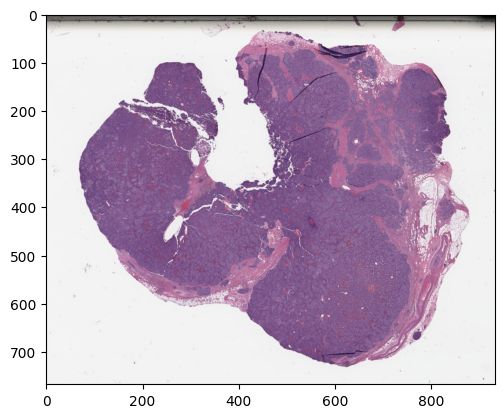

In [36]:
for WSI_name in np.random.choice(WSIs_names, 5):
    WSI = openslide.OpenSlide(f'{WSIs_path}/{WSI_name}')

    WSI_image = WSI.associated_images['thumbnail']

    plt.imshow(WSI_image)
    plt.show()

## 4.) Datos de sobrevivencia

In [44]:
tabular_data = pd.read_csv(tabular_path)
tabular_data = tabular_data[['days_to_death', 'days_to_last_followup', 'vital_status']]

In [45]:
tabular_data.describe()

,days_to_death,days_to_last_followup
count,104.000000,979.000000
mean,1551.423077,728.811032
std,1103.273793,982.104095
min,0.000000,-7.000000
25%,633.250000,101.500000
50%,1325.500000,358.000000
75%,2364.000000,1065.500000
max,4456.000000,7067.000000


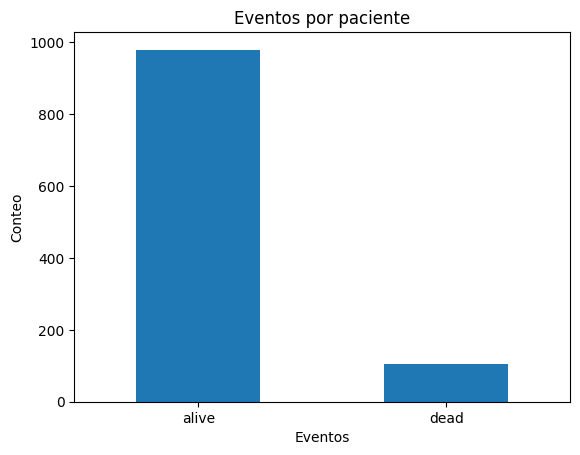

In [48]:
tabular_data.vital_status.value_counts().plot(kind="bar")
plt.title("Eventos por paciente")
plt.xlabel("Eventos")
plt.xticks(rotation=0)
plt.ylabel("Conteo")
plt.show()